# Price Action Trading Bot in Python | No Indicators Strategy for Beginners

Step 1: Import Libraries

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Step 2: Define API Key and URL

In [5]:
api_key = 'HIDDEN_FOR_SECURITY' # replace this with your real key
symbol = 'AAPL'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full'

Step 3: Request the Data and Format It

In [7]:
response = requests.get(url)
data = response.json()

# Analyize the daily prices
df = pd.DataFrame(data['Time Series (Daily)']).T
df. index = pd.to_datetime(df.index)
df = df.sort_index()
df = df.astype(float)

# Keep only closing price
df = df[['4. close']]
df.rename(columns={'4. close': 'Close'}, inplace=True)

 Step 4: Create the Breakout Strategy

In [25]:
df['5D_High'] = df['Close'].rolling(window=5).max().shift(1)
df['5D_Low'] = df['Close'].rolling(window=5).min().shift(1)

df['Signal'] = 0
df.loc[df['Close'] > df['5D_High'], 'Signal'] = 1
df.loc[df['Close'] < df['5D_Low'], 'Signal'] = -1

df['Position'] = df['Signal'].diff()

 Step 5: Plot the Breakout Chart

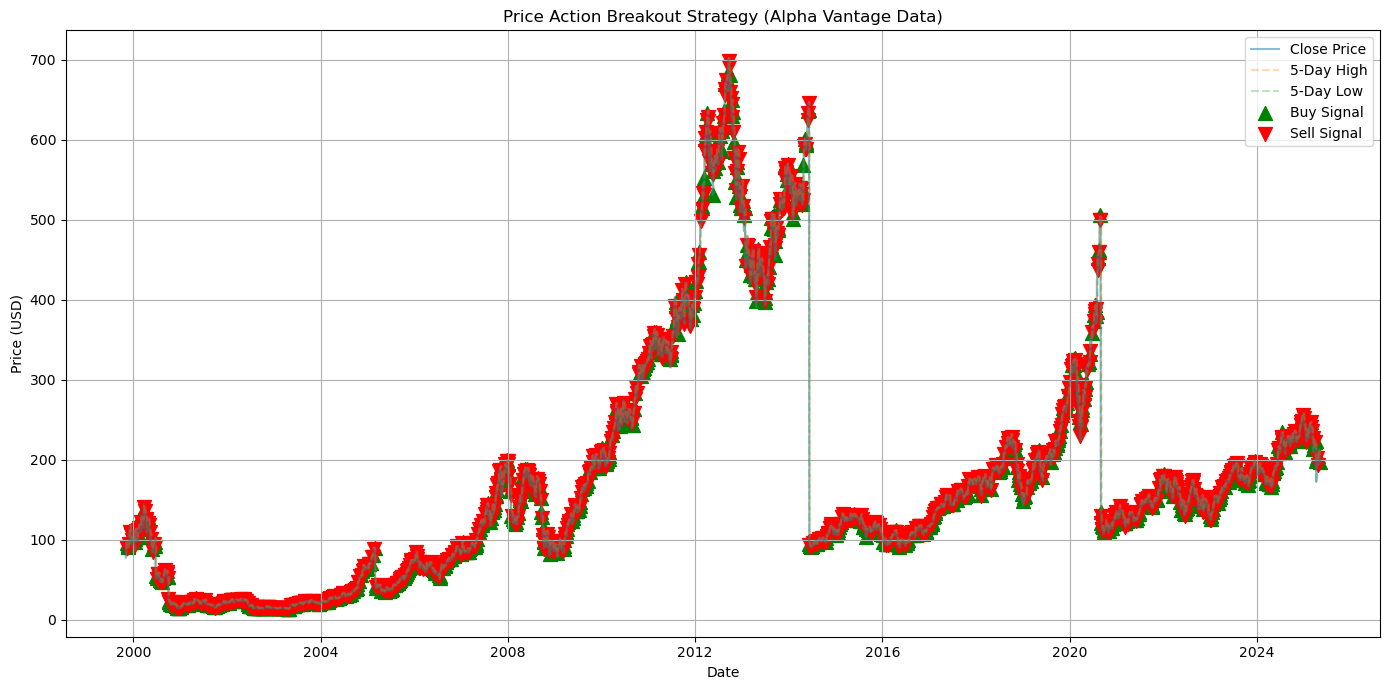

In [32]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['5D_High'], linestyle='--', label='5-Day High', alpha=0.3)
plt.plot(df['5D_Low'], linestyle='--', label='5-Day Low', alpha=0.3)
plt.scatter(df.index[df['Position'] == 1], df['Close'][df['Position'] == 1], marker='^', color='green', label='Buy Signal', s=100)
plt.scatter(df.index[df['Position'] == -1], df['Close'][df['Position'] == -1], marker='v', color='red', label='Sell Signal', s=100)
plt.title('Price Action Breakout Strategy (Alpha Vantage Data)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()